In [5]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [6]:
#!pip install graphviz
#conda install python-graphviz

In [7]:
# loading the data set
dataset = load_iris(as_frame=True)
df= pd.DataFrame(data= dataset.data)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# adding the target and target names to dataframe
target_zip= dict(zip(set(dataset.target), dataset.target_names))
df["target"] = dataset.target
df["target_names"] = df["target"].map(target_zip)

print(df.shape)
df.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Seperating to X and Y 
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [10]:
# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)


X_train shape:  (112, 4)
y_train shape:  (112,)
X_test shape:  (38, 4)
y_test shape:  (38,)


In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


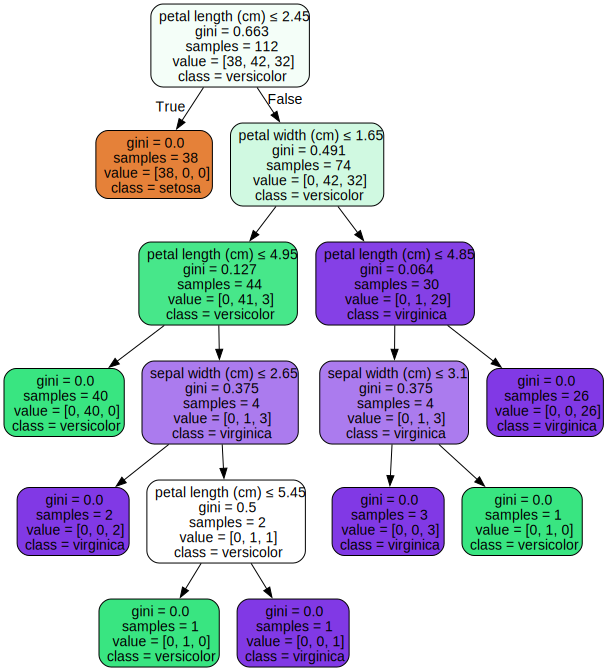

In [12]:
# if you are having issue iwith graphviz, comment this cell

import graphviz


from sklearn.tree import export_graphviz
DecisionTreeClassifier()
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=dataset.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph


In [21]:
import pandas as pd
X_test.to_csv("X_test.csv")

In [18]:
print(X_test)
print(y_test[1])


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
107                7.3               2.9                6.3               1.8
114                5.8               2.8                5.1               2.4
57                 4.9               2.4                3.3               1.0
59                 5.2               2.7                3.9               1.4
105                7.6               3.0                6.6               2.1
11                 4.8               3.4                1.6               0.2
48                 5.3               3.7                1.5               0.2
72                 6.3               2.5                4.9               1.5
29                 4.7               3.2                1.6               0.2
148                6.2               3.4                5.4               2.3
30                 4.8               3.1                1.6               0.2
19                 5.1               3.8                1.5     

In [15]:
predictions = dt.predict(X_test)
print(predictions)

[np.str_('virginica') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('virginica') np.str_('setosa')
 np.str_('setosa') np.str_('versicolor') np.str_('setosa')
 np.str_('virginica') np.str_('setosa') np.str_('setosa')
 np.str_('setosa') np.str_('virginica') np.str_('virginica')
 np.str_('setosa') np.str_('virginica') np.str_('setosa')
 np.str_('virginica') np.str_('virginica') np.str_('virginica')
 np.str_('virginica') np.str_('virginica') np.str_('versicolor')
 np.str_('virginica') np.str_('setosa') np.str_('virginica')
 np.str_('virginica') np.str_('setosa') np.str_('virginica')
 np.str_('versicolor') np.str_('setosa') np.str_('virginica')
 np.str_('versicolor') np.str_('versicolor') np.str_('virginica')
 np.str_('setosa') np.str_('versicolor')]


In [12]:

N = 10
predicted_label = predictions[N]
predicted_label
y_test = np.array(y_test)
print("True label : ",y_test[N])
print("Predicted label : ",predicted_label)

True label :  setosa
Predicted label :  setosa


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print("My Implementation:\nACCURACY: {}".format(accuracy_score(y_test, predictions)))

My Implementation:
ACCURACY: 0.9736842105263158
